In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 18})
plt.rcParams['xtick.major.pad']='10'
plt.rcParams['ytick.major.pad']='10'

In [2]:
ratings = pd.read_csv('/Users/olivermarley/Downloads/data.tsv', sep='\t', header=0)
title_basics = pd.read_csv('/Users/olivermarley/Downloads/data-4.tsv', sep='\t', header=0)

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [30]:
title_type_ratings_merge = (title_basics
                      .merge(
                          ratings, 
                          how='inner', 
                          left_on='tconst', 
                          right_on='tconst'
                      ))
                            
title_type_ratings = (title_type_ratings_merge
                      .groupby(['titleType','averageRating'])
                      .count()
                      [['tconst']]
                      .reset_index()
                     )

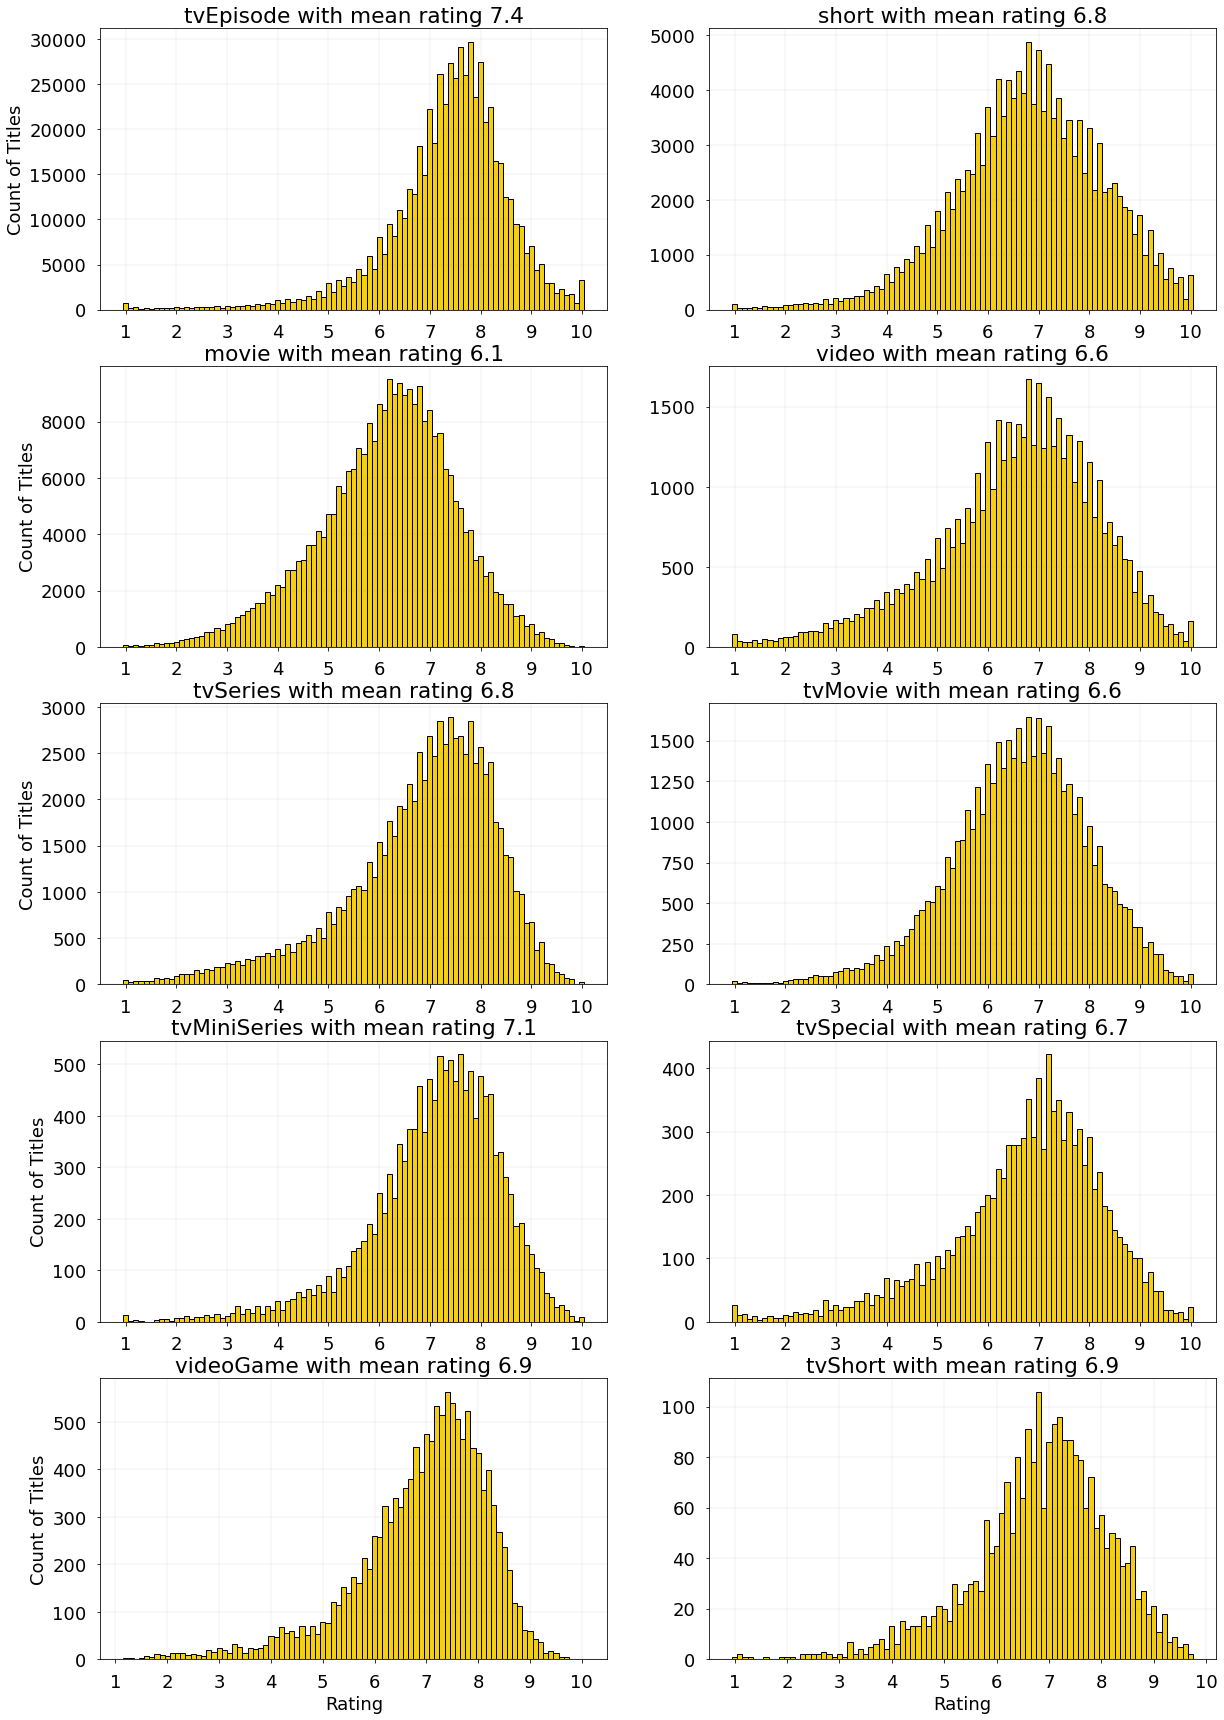

In [22]:
figure, ax = plt.subplots(5, 2,figsize=(20, 30))

k = 0
for i in range(5):
    for j in range(2):
    
        titleType = title_basics.titleType.value_counts().index.values[k]
        k +=1

        x = title_type_ratings.loc[lambda x: x.titleType==titleType].averageRating.values
        y = title_type_ratings.loc[lambda x: x.titleType==titleType].tconst.values
        mean = sum(x*y)/sum(y)
        ax[i, j].bar(x,
                     y,
                     edgecolor='black', 
                     width=0.1, 
                     color='#f3ce13'
            )

        ax[i,j].set_title(f"{titleType} with mean rating {mean:.1f}")
        ax[i,j].grid(color='grey', linestyle='-', linewidth=0.1)

# Set the ticks and ticklabels for all axes
plt.setp(ax, xticks=range(1,11), xticklabels=range(1,11))

# set labels
plt.setp(ax[-1, :], xlabel='Rating')
plt.setp(ax[:, 0], ylabel='Count of Titles')

    
plt.show()

In [40]:
from random import randint
colors = []
n = 4
for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

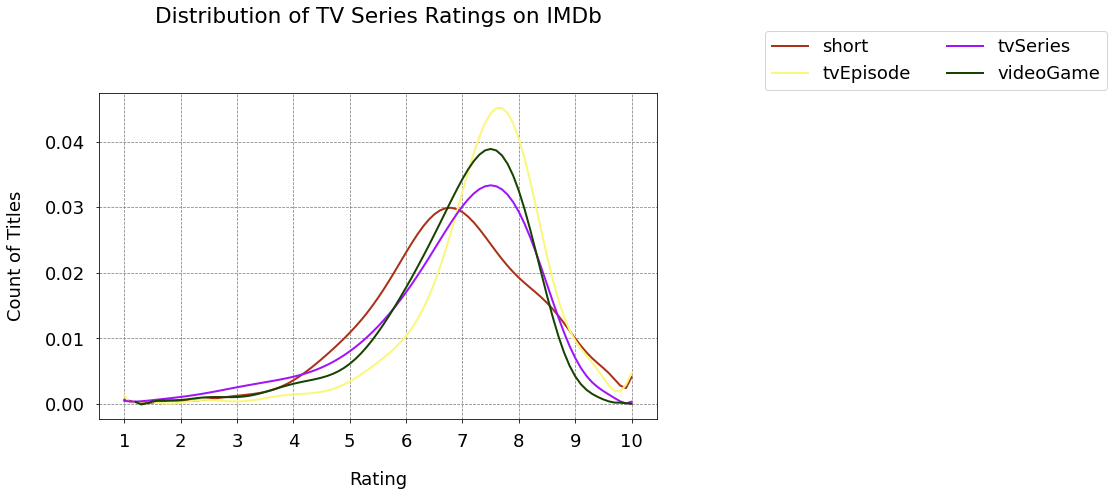

In [41]:
plt.figure(num=1,figsize=(10, 6))


k=0
titleType = title_type_ratings.titleType.unique()

for i in titleType:
    if i in ['moive','tvSeries','short','videoGame', 'tvEpisode']:

        list_x = title_type_ratings.loc[lambda x: x.titleType==i].averageRating.values
        list_y = title_type_ratings.loc[lambda x: x.titleType==i].tconst.values
        list_y = [i/sum(list_y) for i in list_y]
        poly = np.polyfit(list_x,list_y,15)
        poly_y = np.poly1d(poly)(list_x)

        ax = plt.plot(list_x,poly_y, 
             color=colors[k], 
             linewidth= 2,
             label = i)
        k+=1
    
plt.xticks(rotation=0)    
plt.xticks(np.arange(1, 11, 1.0))
plt.xlabel("Rating", labelpad=20)
plt.ylabel("Count of Titles", labelpad=20)
plt.title('Distribution of TV Series Ratings on IMDb', pad=70)
leg = plt.legend(loc='center', bbox_to_anchor=(1.5, 1.1), shadow=False, ncol=2)
plt.grid(color='grey', linestyle='--', linewidth=0.75)
plt.show()

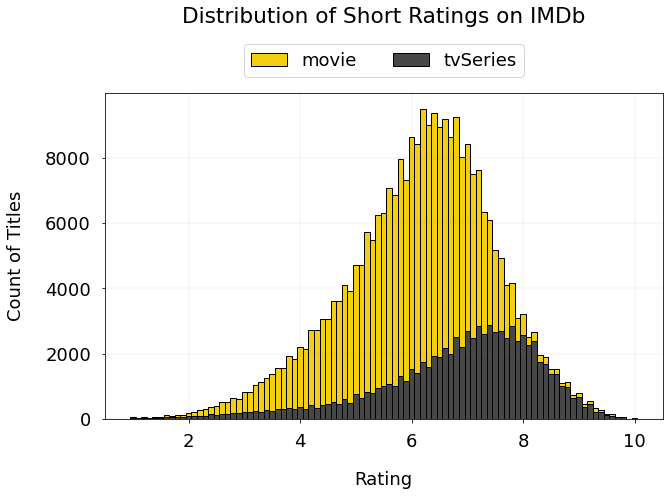

In [80]:
figure, ax = plt.subplots(figsize = (10,6))


x = title_type_ratings.loc[lambda x: x.titleType=='movie'].averageRating.values
y = title_type_ratings.loc[lambda x: x.titleType=='movie'].tconst.values

x_ = title_type_ratings.loc[lambda x: x.titleType=='tvSeries'].averageRating.values
y_ = title_type_ratings.loc[lambda x: x.titleType=='tvSeries'].tconst.values

ax.bar(x,
       y,
       edgecolor='black', 
       width=0.1, 
       color='#f3ce13',
       label='movie'
    )

ax.bar(x_,
       y_,
       edgecolor='black', 
       width=0.1, 
       color='#474747',
       label = 'tvSeries'
    )

plt.xticks(rotation=0)    
plt.xlabel("Rating", labelpad=20)
plt.ylabel("Count of Titles", labelpad=20)
plt.title('Distribution of Short Ratings on IMDb', pad=70)
plt.grid(color='grey', linestyle='-', linewidth=0.1)
leg = plt.legend(loc='center', bbox_to_anchor=(0.5, 1.1), shadow=False, ncol=2)


plt.show()

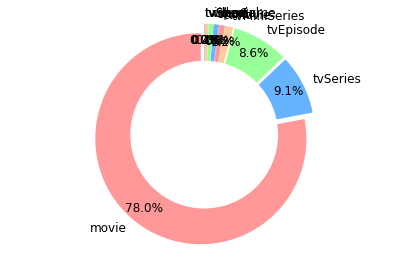

In [102]:
# Pie chart
labels = votes_by_type.index.values
sizes = votes_by_type.numVotes
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
#explsion
explode = (0.05,0.05)*5
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode, textprops={'fontsize': 12})
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')  
plt.tight_layout()
plt.show()